Enter x_min: 200
Enter x_max: 550
Enter y_min: 200
Enter y_max: 550
Enter x1 and y1: 50 60
Enter x2 and y2: 680 630

Line clipped from (204.74, 200.00) to (550.00, 512.38)


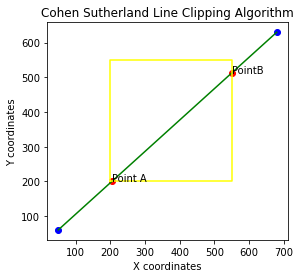

In [8]:
import matplotlib.pyplot as plt

INSIDE = 0  # 0000
LEFT = 1  # 0001
RIGHT = 2  # 0010
BOTTOM = 4  # 0100
TOP = 8  # 1000


def compute_code(x, y, x_min, x_max, y_min, y_max):
    code = INSIDE
    if x < x_min:
        code |= LEFT
    elif x > x_max:
        code |= RIGHT
    if y < y_min:
        code |= BOTTOM
    elif y > y_max:
        code |= TOP

    return code


def cohen_sutherland(x1, y1, x2, y2, x_min, x_max, y_min, y_max):
    code1 = compute_code(x1, y1, x_min, x_max, y_min, y_max)
    code2 = compute_code(x2, y2, x_min, x_max, y_min, y_max)

    accept = False
    a = [x1, x2]
    b = [y1, y2]
    plt.plot(a, b, color='green')

    while True:

        if code1 == 0 and code2 == 0:
            accept = True
            break

        elif (code1 & code2) != 0:  # AND not 0 => line is completely outside
            break

        else:
            x = 1.0
            y = 1.0
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
                y = y_max
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min

            if code_out == code1:
                x1 = x
                y1 = y
                code1 = compute_code(x1, y1, x_min, x_max, y_min, y_max)

            else:
                x2 = x
                y2 = y
                code2 = compute_code(x2, y2, x_min, x_max, y_min, y_max)

    X = [x_min, x_max, x_max, x_min, x_min]
    Y = [y_min, y_min, y_max, y_max, y_min]

    plt.title("Cohen Sutherland Line Clipping Algorithm")
    plt.xlabel("X coordinates")
    plt.ylabel("Y coordinates")
    plt.plot(X, Y, color='yellow')
    plt.axis('scaled')

    if accept:
        print("\nLine clipped from (%.2f, %.2f) to (%.2f, %.2f)" % (x1, y1, x2, y2))
        plt.scatter(x1, y1, color="red")
        plt.text(x1, y1, "Point A")
        plt.scatter(x2, y2, color="red")
        plt.text(x2,y2,"PointB")
    else:
        print("Line rejected")

    plt.show()


if __name__ == "__main__":
    x_min = int(input("Enter x_min: "))
    x_max = int(input("Enter x_max: "))
    y_min = int(input("Enter y_min: "))
    y_max = int(input("Enter y_max: "))

    x1, y1 = map(int, input("Enter x1 and y1: ").split())
    x2, y2 = map(int, input("Enter x2 and y2: ").split())

    plt.scatter(x1, y1, color="blue")
    plt.scatter(x2, y2, color="blue")

    cohen_sutherland(x1, y1, x2, y2, x_min, x_max, y_min, y_max)